In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from sklearn.linear_model import Ridge
from scipy.stats import norm, zscore

In [2]:
df_day_2 = pd.read_csv('./round-5-island-data-bottle/prices_round_5_day_2.csv', sep=';')
df_day_3 = pd.read_csv('./round-5-island-data-bottle/prices_round_5_day_3.csv', sep=';')
df_day_4 = pd.read_csv('./round-5-island-data-bottle/prices_round_5_day_4.csv', sep=';')
df = pd.concat([df_day_2, df_day_3, df_day_4])
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,2,0,PICNIC_BASKET2,30094.0,11.0,30093.0,27.0,NaN,NaN,30099.0,1.0,30100.0,37.0,NaN,NaN,30096.5,0.0
1,2,0,VOLCANIC_ROCK_VOUCHER_9750,469.0,11.0,NaN,NaN,NaN,NaN,470.0,11.0,NaN,NaN,NaN,NaN,469.5,0.0
2,2,0,RAINFOREST_RESIN,9992.0,35.0,NaN,NaN,NaN,NaN,10008.0,35.0,NaN,NaN,NaN,NaN,10000.0,0.0
3,2,0,VOLCANIC_ROCK_VOUCHER_9500,718.0,11.0,NaN,NaN,NaN,NaN,719.0,11.0,NaN,NaN,NaN,NaN,718.5,0.0
4,2,0,VOLCANIC_ROCK,10218.0,150.0,10217.0,64.0,NaN,NaN,10219.0,150.0,10220.0,64.0,NaN,NaN,10218.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,4,999900,VOLCANIC_ROCK_VOUCHER_10500,0.0,11.0,NaN,NaN,NaN,NaN,2.0,11.0,NaN,NaN,NaN,NaN,1.0,0.0
149996,4,999900,DJEMBES,13409.0,30.0,13408.0,50.0,NaN,NaN,13410.0,80.0,NaN,NaN,NaN,NaN,13409.5,0.0
149997,4,999900,VOLCANIC_ROCK,10104.0,146.0,NaN,NaN,NaN,NaN,10106.0,104.0,10107.0,42.0,NaN,NaN,10105.0,0.0
149998,4,999900,RAINFOREST_RESIN,9992.0,35.0,NaN,NaN,NaN,NaN,9999.0,1.0,10008.0,35.0,NaN,NaN,9995.5,0.0


In [3]:
unique_products = df['product'].unique()
print(unique_products)

['PICNIC_BASKET2' 'VOLCANIC_ROCK_VOUCHER_9750' 'RAINFOREST_RESIN'
 'VOLCANIC_ROCK_VOUCHER_9500' 'VOLCANIC_ROCK' 'SQUID_INK'
 'VOLCANIC_ROCK_VOUCHER_10250' 'KELP' 'DJEMBES' 'CROISSANTS'
 'MAGNIFICENT_MACARONS' 'JAMS' 'VOLCANIC_ROCK_VOUCHER_10000'
 'VOLCANIC_ROCK_VOUCHER_10500' 'PICNIC_BASKET1']


In [4]:
# Create a datetime-like index
df['combined_ts'] = df['day'].astype(str) + '_' + df['timestamp'].astype(str)
df_by_product = {}
for product in unique_products:
    df_by_product[product] = df[df['product'] == product]
    df_by_product[product].set_index('combined_ts', inplace=True)

In [5]:
df_by_product['VOLCANIC_ROCK']

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
combined_ts,,,,,,,,,,,,,,,,,
2_0,2,0,VOLCANIC_ROCK,10218.0,150.0,10217.0,64.0,NaN,NaN,10219.0,150.0,10220.0,64.0,NaN,NaN,10218.5,0.0
2_100,2,100,VOLCANIC_ROCK,10217.0,106.0,10216.0,44.0,NaN,NaN,10218.0,106.0,10219.0,44.0,NaN,NaN,10217.5,0.0
2_200,2,200,VOLCANIC_ROCK,10221.0,136.0,10220.0,55.0,NaN,NaN,10223.0,191.0,NaN,NaN,NaN,NaN,10222.0,0.0
2_300,2,300,VOLCANIC_ROCK,10222.0,168.0,NaN,NaN,NaN,NaN,10224.0,107.0,10225.0,61.0,NaN,NaN,10223.0,0.0
2_400,2,400,VOLCANIC_ROCK,10216.0,181.0,NaN,NaN,NaN,NaN,10218.0,127.0,10219.0,54.0,NaN,NaN,10217.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4_999500,4,999500,VOLCANIC_ROCK,10104.0,193.0,NaN,NaN,NaN,NaN,10106.0,142.0,10107.0,51.0,NaN,NaN,10105.0,0.0
4_999600,4,999600,VOLCANIC_ROCK,10105.0,131.0,10104.0,74.0,NaN,NaN,10107.0,207.0,NaN,NaN,NaN,NaN,10106.0,0.0
4_999700,4,999700,VOLCANIC_ROCK,10106.0,123.0,10105.0,56.0,NaN,NaN,10107.0,123.0,10108.0,56.0,NaN,NaN,10106.5,0.0


<Axes: xlabel='combined_ts'>

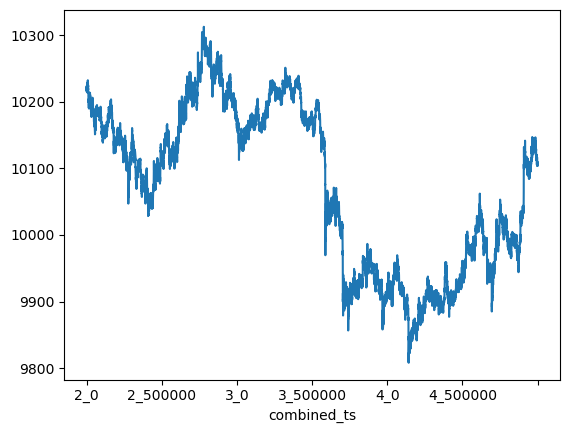

In [6]:
df_by_product['VOLCANIC_ROCK']['mid_price'].plot()

In [7]:
VOR_vol = df_by_product['VOLCANIC_ROCK']['mid_price'].pct_change().std() * (365 * 10000)**0.5
VOR_vol

0.43664882067241645

<Axes: xlabel='combined_ts'>

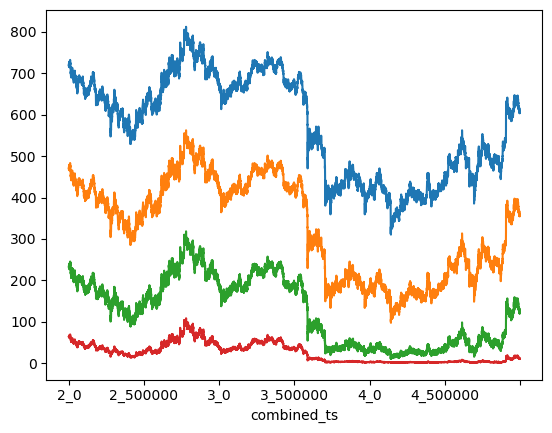

In [8]:
# premium
df_by_product['VOLCANIC_ROCK_VOUCHER_9500']['mid_price'].plot()
df_by_product['VOLCANIC_ROCK_VOUCHER_9750']['mid_price'].plot()
df_by_product['VOLCANIC_ROCK_VOUCHER_10000']['mid_price'].plot()
df_by_product['VOLCANIC_ROCK_VOUCHER_10250']['mid_price'].plot()

In [9]:
# Black-Scholes formula for call option
def black_scholes_call(S, K, T, sigma, r=0.0):
    if T <= 0 or sigma <= 0:
        return max(S - K, 0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
# Implied volatility solver
def implied_vol_bs_binary_search(S, K, T, market_price, tol=1e-5, max_iter=100):
    low, high = 1e-5, 5.0
    for _ in range(max_iter):
        mid = (low + high) / 2
        price = black_scholes_call(S, K, T, mid)

        if abs(price - market_price) < tol:
            return mid
        if price < market_price:
            low = mid
        else:
            high = mid
    return (low + high) / 2

In [10]:
# Parameters for each voucher
strikes = {
    'VOLCANIC_ROCK_VOUCHER_9500': 9500,
    'VOLCANIC_ROCK_VOUCHER_9750': 9750,
    'VOLCANIC_ROCK_VOUCHER_10000': 10000,
    'VOLCANIC_ROCK_VOUCHER_10250': 10250,
    'VOLCANIC_ROCK_VOUCHER_10500': 10500,
}

In [11]:
for voucher, K in strikes.items():
    df = df_by_product[voucher]
    df = df.copy()  # avoid modifying the original view
    df['TTE'] = 7 - df['day'] + 1 - df['timestamp'] / 1000000
    df_by_product[voucher] = df
#     df_by_product[voucher]['TTE'] = 7 - df_by_product[voucher]['day'] + 1
#     df_by_product[voucher]['TTE'] -= df_by_product[voucher]['timestamp'] / 10000

In [12]:
df_by_product['VOLCANIC_ROCK_VOUCHER_9500'] 

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,TTE
combined_ts,,,,,,,,,,,,,,,,,,
2_0,2,0,VOLCANIC_ROCK_VOUCHER_9500,718.0,11.0,NaN,NaN,NaN,NaN,719.0,11.0,NaN,NaN,NaN,NaN,718.5,0.0,6.0000
2_100,2,100,VOLCANIC_ROCK_VOUCHER_9500,717.0,19.0,NaN,NaN,NaN,NaN,719.0,19.0,NaN,NaN,NaN,NaN,718.0,0.0,5.9999
2_200,2,200,VOLCANIC_ROCK_VOUCHER_9500,722.0,15.0,NaN,NaN,NaN,NaN,723.0,15.0,NaN,NaN,NaN,NaN,722.5,0.0,5.9998
2_300,2,300,VOLCANIC_ROCK_VOUCHER_9500,723.0,16.0,NaN,NaN,NaN,NaN,724.0,16.0,NaN,NaN,NaN,NaN,723.5,0.0,5.9997
2_400,2,400,VOLCANIC_ROCK_VOUCHER_9500,717.0,16.0,NaN,NaN,NaN,NaN,718.0,16.0,NaN,NaN,NaN,NaN,717.5,0.0,5.9996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4_999500,4,999500,VOLCANIC_ROCK_VOUCHER_9500,605.0,15.0,NaN,NaN,NaN,NaN,606.0,15.0,NaN,NaN,NaN,NaN,605.5,0.0,3.0005
4_999600,4,999600,VOLCANIC_ROCK_VOUCHER_9500,606.0,14.0,NaN,NaN,NaN,NaN,607.0,14.0,NaN,NaN,NaN,NaN,606.5,0.0,3.0004
4_999700,4,999700,VOLCANIC_ROCK_VOUCHER_9500,606.0,16.0,NaN,NaN,NaN,NaN,607.0,16.0,NaN,NaN,NaN,NaN,606.5,0.0,3.0003


In [13]:
def compute_all_iv(df_by_product, strikes):
    # Initialize a dataframe to store implied volatilities
    iv_df = pd.DataFrame(index=df_by_product['VOLCANIC_ROCK'].index)

    # Underlying mid price
    S_series = df_by_product['VOLCANIC_ROCK']['mid_price']

    for voucher, K in strikes.items():
        V_series = df_by_product[voucher]['mid_price']
        TTE_series = df_by_product[voucher]['TTE']
        iv_series = []

        for t in S_series.index:
            S_t = S_series.loc[t]
            V_t = V_series.loc[t]
            TTE = TTE_series.loc[t] / 365
            iv = implied_vol_bs_binary_search(S_t, K, TTE, V_t)
            iv_series.append(iv)

        iv_df[voucher] = iv_series

    return iv_df

In [14]:
# If it's Round 5:
round_number = 5
days_left = 7 - round_number + 1

iv_by_voucher = compute_all_iv(df_by_product, strikes)

In [15]:
iv_by_voucher

,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,VOLCANIC_ROCK_VOUCHER_10000,VOLCANIC_ROCK_VOUCHER_10250,VOLCANIC_ROCK_VOUCHER_10500
combined_ts,,,,,
2_0,0.078135,0.165482,0.158025,0.149471,0.156877
2_100,0.223597,0.175005,0.164212,0.148386,0.157301
2_200,0.224795,0.176402,0.154452,0.148408,0.159952
2_300,0.225062,0.176713,0.151289,0.149474,0.159522
2_400,0.223470,0.174855,0.165591,0.148813,0.157516
...,...,...,...,...,...
4_999500,0.273334,0.197078,0.142954,0.149888,0.195778
4_999600,0.273725,0.169245,0.147531,0.149190,0.195346
4_999700,0.078135,0.186065,0.149805,0.148841,0.195132


In [16]:
def calc_moneyness(K, S, TTE_days):
    TTE = TTE_days / 365  # convert days to years
    return np.log(K / S) / np.sqrt(TTE)

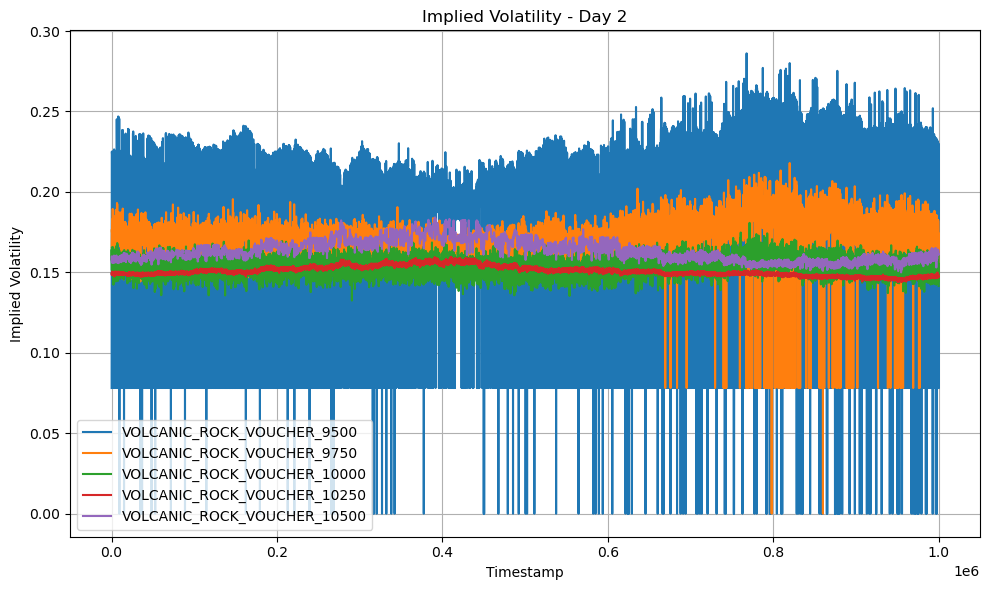

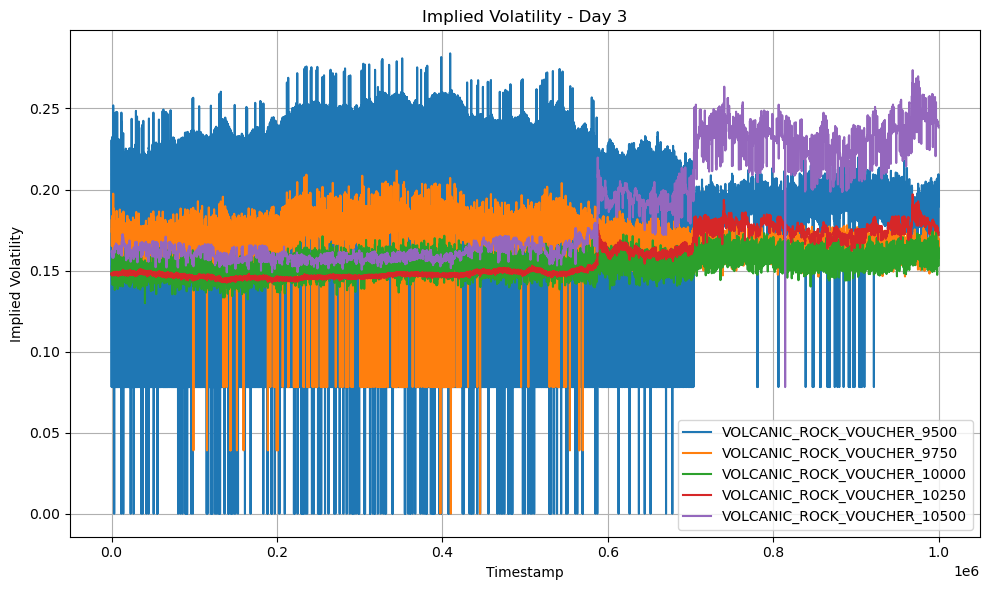

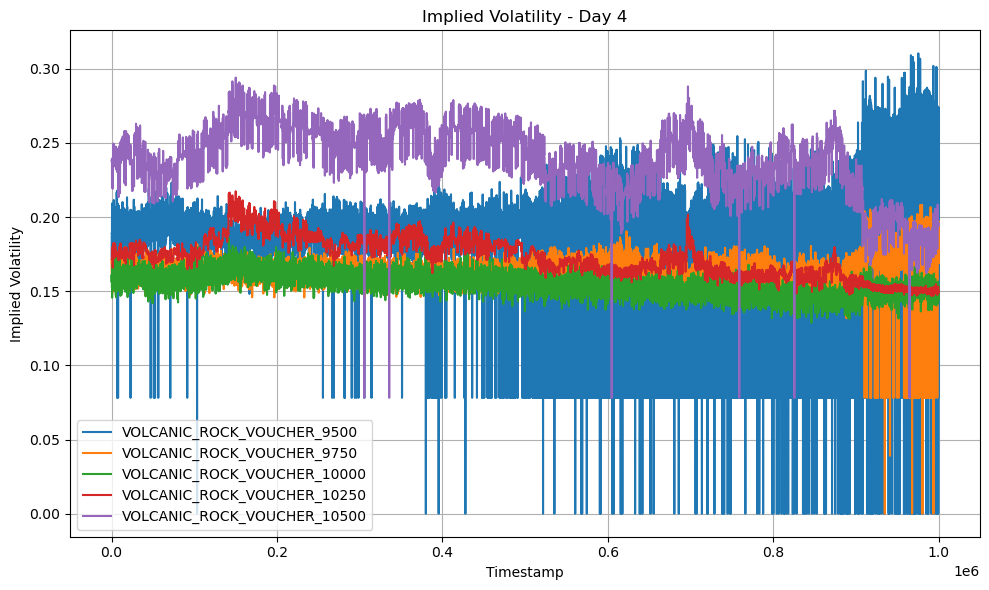

In [17]:
# Extract day from index
iv_by_voucher['day'] = iv_by_voucher.index.str.split('_').str[0].astype(int)
iv_by_voucher['timestamp'] = iv_by_voucher.index.str.split('_').str[1].astype(int)

# Group by day and plot separately
for day in [2, 3, 4]:
    df_day = iv_by_voucher[iv_by_voucher['day'] == day]

    plt.figure(figsize=(10, 6))
    for col in df_day.columns.drop(['day', 'timestamp']):
        plt.plot(df_day['timestamp'], df_day[col], label=col)

    plt.title(f'Implied Volatility - Day {day}')
    plt.xlabel('Timestamp')
    plt.ylabel('Implied Volatility')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [18]:
# Create a DataFrame for m_t
m_t_df = pd.DataFrame(index=iv_by_voucher.index)

# Calculate m_t for each voucher
for voucher, K in strikes.items():
    # Get spot price (S_t) from the underlying asset (VOLCANIC_ROCK) and the timestamp
    S_series = df_by_product['VOLCANIC_ROCK']['mid_price']
    
    # Calculate m_t for each timestamp
    m_t = [calc_moneyness(K, S_series.loc[t], days_left) for t in iv_by_voucher.index]
    
    m_t_df[voucher] = m_t

m_t_df

,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,VOLCANIC_ROCK_VOUCHER_10000,VOLCANIC_ROCK_VOUCHER_10250,VOLCANIC_ROCK_VOUCHER_10500
combined_ts,,,,,
2_0,-0.804194,-0.517678,-0.238416,0.033950,0.299752
2_100,-0.803115,-0.516598,-0.237336,0.035030,0.300832
2_200,-0.807972,-0.521455,-0.242193,0.030173,0.295975
2_300,-0.809051,-0.522534,-0.243272,0.029094,0.294896
2_400,-0.802575,-0.516059,-0.236797,0.035569,0.301372
...,...,...,...,...,...
4_999500,-0.680992,-0.394476,-0.115214,0.157152,0.422954
4_999600,-0.682084,-0.395567,-0.116305,0.156061,0.421863
4_999700,-0.682630,-0.396113,-0.116851,0.155515,0.421317


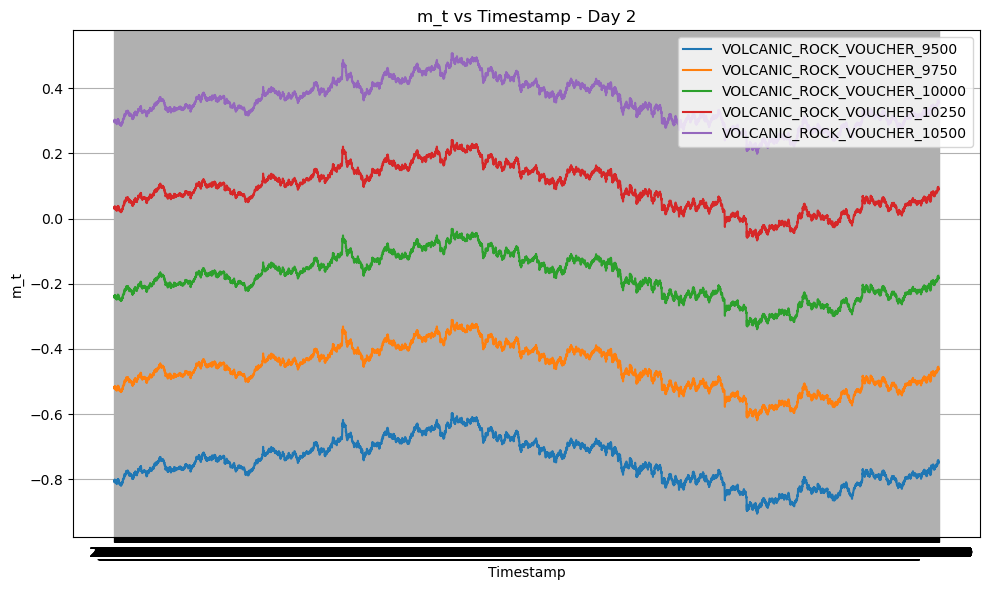

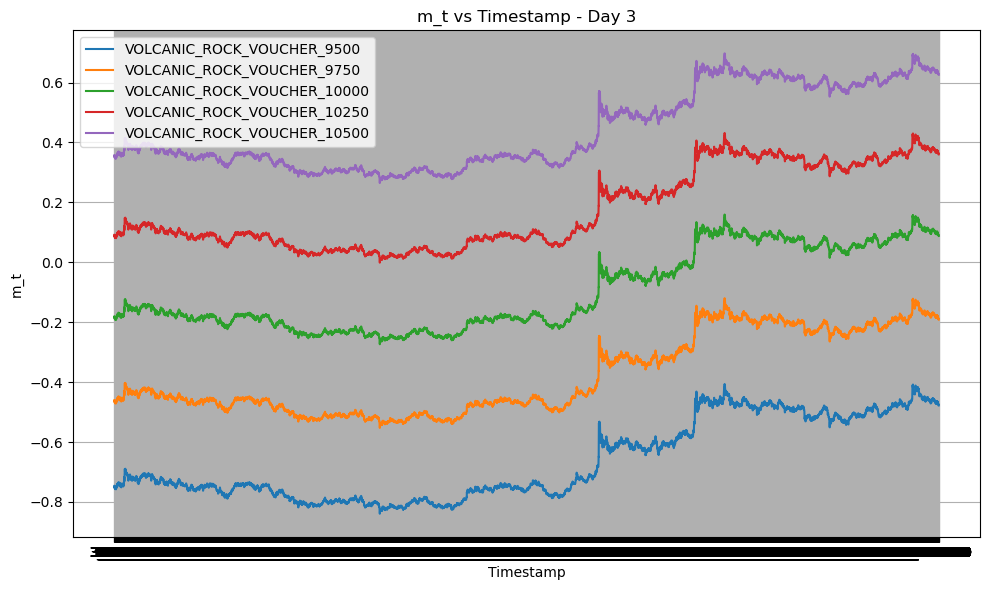

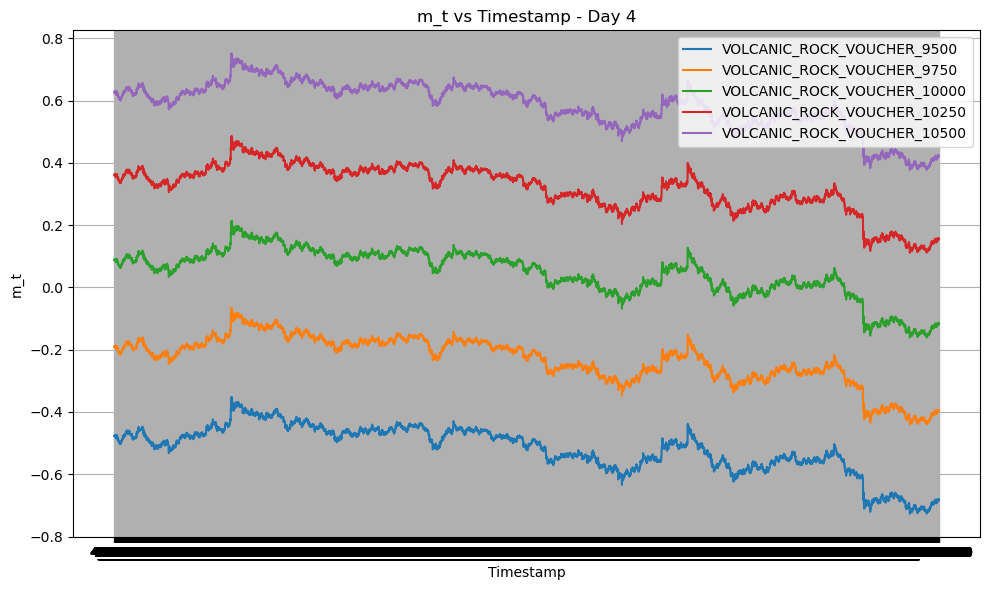

In [19]:
for day in [2, 3, 4]:
    df_day = m_t_df[iv_by_voucher['day'] == day]

    plt.figure(figsize=(10, 6))
    for col in df_day.columns:
        plt.plot(df_day.index, df_day[col], label=col)

    plt.title(f'm_t vs Timestamp - Day {day}')
    plt.xlabel('Timestamp')
    plt.ylabel('m_t')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [20]:
def fit_iv_curve(m, v):
    coeffs = np.polyfit(m, v, 2)
    poly = np.poly1d(coeffs)
    return poly

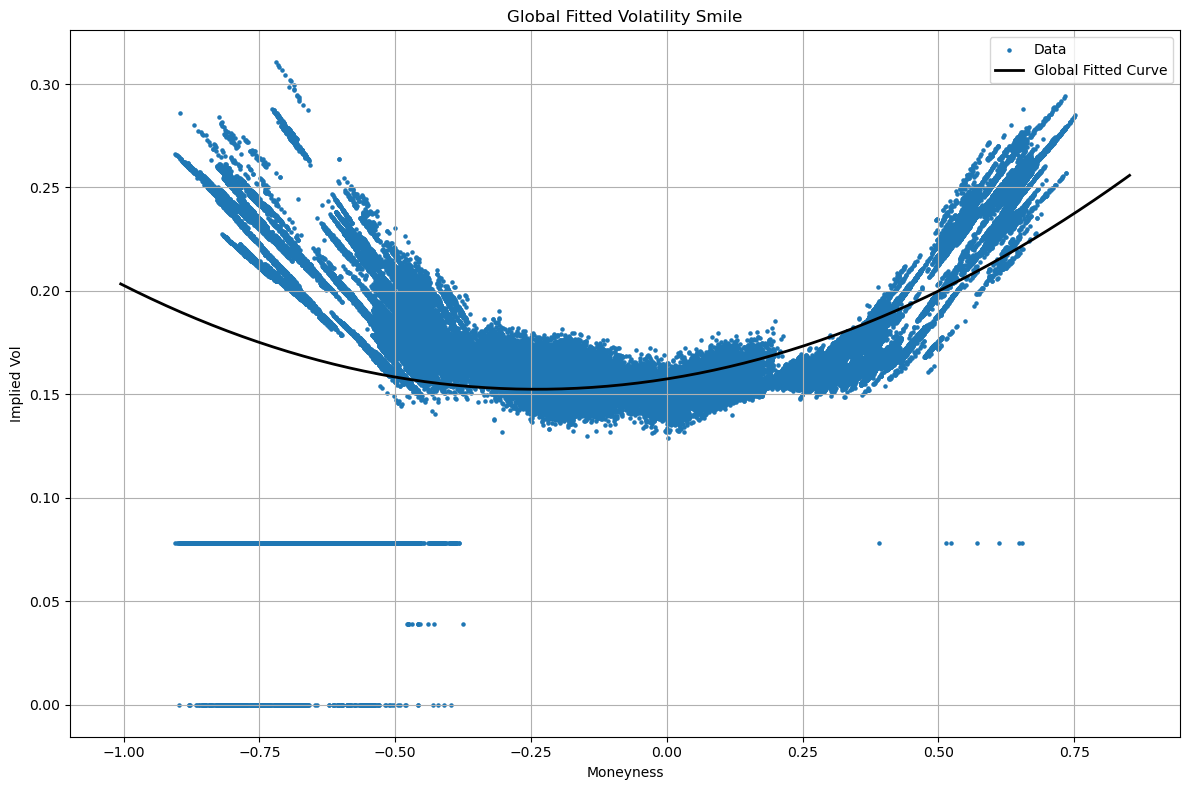

In [21]:
plt.figure(figsize=(12, 8))

m_t_all = []
v_t_all = []

for voucher in strikes.keys():
    m_t = m_t_df[voucher].values
    v_t = iv_by_voucher[voucher].values
    
    m_t_all += list(m_t)
    v_t_all += list(v_t)

# print(len(m_t_all))
# print(len(v_t_all))
plt.scatter(m_t_all, v_t_all, label=f'Data', s=5)
m_t_all = np.array(m_t_all)
v_t_all = np.array(v_t_all)

fitted_global_curve = fit_iv_curve(m_t_all, v_t_all)

m_t_dense = np.linspace(m_t_all.min() - 0.1, m_t_all.max() + 0.1, 200)
plt.plot(m_t_dense, fitted_global_curve(m_t_dense), label='Global Fitted Curve', color='black', linewidth=2)

plt.title('Global Fitted Volatility Smile')
plt.xlabel('Moneyness')
plt.ylabel('Implied Vol')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# a_global, b_global, c_global = fitted_global_curve
# print(a_global, b_global, c_global)
fitted_global_curve

poly1d([0.08681173, 0.04155722, 0.15743483])

In [23]:
# Convert to arrays
m_t_all = np.array(m_t_all)
v_t_all = np.array(v_t_all)

# Compute z-scores for v_t
# v_t_z = zscore(v_t_all)

# Filter where absolute z-score < threshold (e.g. 2 or 3)
mask = v_t_all >= 0.12

# Apply mask
m_t_filtered = m_t_all[mask]
v_t_filtered = v_t_all[mask]

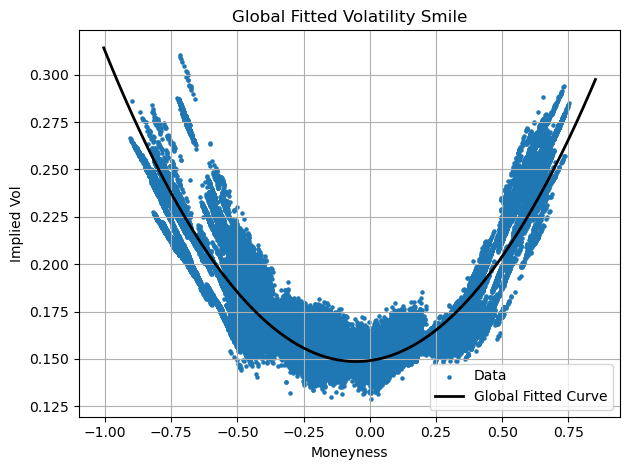

In [24]:
plt.scatter(m_t_filtered, v_t_filtered, label=f'Data', s=5)
fitted_global_curve = fit_iv_curve(m_t_filtered, v_t_filtered)

m_t_dense = np.linspace(m_t_all.min() - 0.1, m_t_all.max() + 0.1, 200)
plt.plot(m_t_dense, fitted_global_curve(m_t_dense), label='Global Fitted Curve', color='black', linewidth=2)

plt.title('Global Fitted Volatility Smile')
plt.xlabel('Moneyness')
plt.ylabel('Implied Vol')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
fitted_global_curve

poly1d([0.18216592, 0.0189207 , 0.14908827])

In [26]:
iv_by_voucher = iv_by_voucher.drop(['day', 'timestamp'], axis=1)

In [27]:
fitted_curve = fit_iv_curve(m_t_df.iloc[0], iv_by_voucher.iloc[0])
fitted_curve

poly1d([-0.15170174, -0.02463439,  0.1677934 ])

In [28]:
# m_t_sorted = np.sort(m_t_df.iloc[-1])
# plt.plot(m_t_sorted, fitted_curve(m_t_sorted), label=f'{voucher} Fitted Curve', linestyle='--')
m_t_df

,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,VOLCANIC_ROCK_VOUCHER_10000,VOLCANIC_ROCK_VOUCHER_10250,VOLCANIC_ROCK_VOUCHER_10500
combined_ts,,,,,
2_0,-0.804194,-0.517678,-0.238416,0.033950,0.299752
2_100,-0.803115,-0.516598,-0.237336,0.035030,0.300832
2_200,-0.807972,-0.521455,-0.242193,0.030173,0.295975
2_300,-0.809051,-0.522534,-0.243272,0.029094,0.294896
2_400,-0.802575,-0.516059,-0.236797,0.035569,0.301372
...,...,...,...,...,...
4_999500,-0.680992,-0.394476,-0.115214,0.157152,0.422954
4_999600,-0.682084,-0.395567,-0.116305,0.156061,0.421863
4_999700,-0.682630,-0.396113,-0.116851,0.155515,0.421317


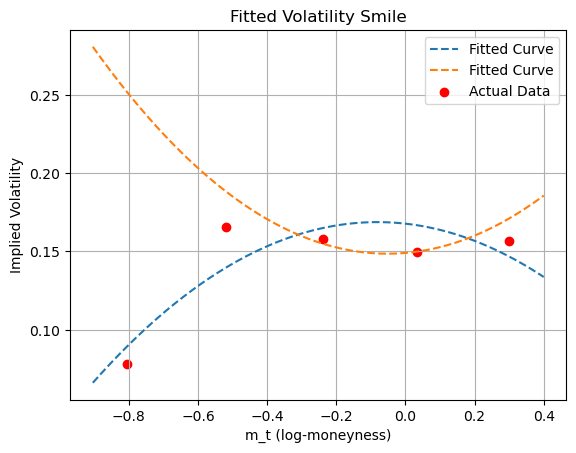

In [29]:
# 1. Get the current m_t values (just the latest row for example)
timestamp = 0
m_t_current = m_t_df.iloc[timestamp]
v_t_current = iv_by_voucher.iloc[timestamp]  # assuming iv_by_voucher is a DataFrame

# 2. Fit the curve (assuming you have this function already)
fitted_curve = fit_iv_curve(m_t_current, v_t_current)

# 3. Generate a smooth range of m_t for plotting
m_t_dense = np.linspace(m_t_current.min() - 0.1, m_t_current.max() + 0.1, 200)

# 4. Plot the fitted curve
plt.plot(m_t_dense, fitted_curve(m_t_dense), label='Fitted Curve', linestyle='--')
plt.plot(m_t_dense, fitted_global_curve(m_t_dense), label='Fitted Curve', linestyle='--')

# 5. Optionally: scatter actual data points for reference
plt.scatter(m_t_current, v_t_current, color='red', label='Actual Data')

plt.xlabel('m_t (log-moneyness)')
plt.ylabel('Implied Volatility')
plt.title('Fitted Volatility Smile')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Design matrix and priors
X = np.column_stack([m_t_current**2, m_t_current, np.ones_like(m_t_current)])

# Fit with L2 regularization
model = Ridge(alpha=1.0, fit_intercept=False)
model.fit(X, v_t_current)
a_local, b_local, c_local = model.coef_

a_local, b_local, c_local

(-0.0039046862954651646, 0.004958592350696238, 0.11970355347185233)

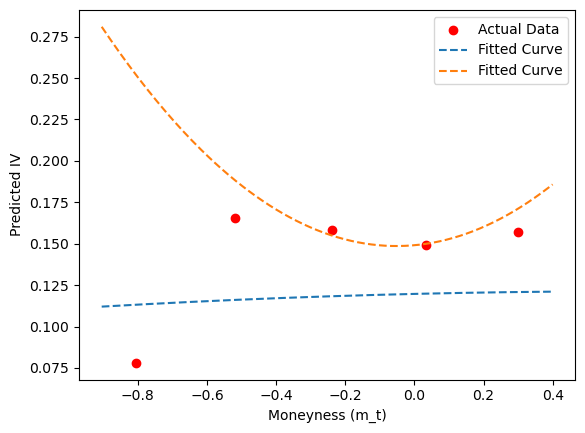

In [31]:
m_t_dense = np.linspace(m_t_current.min() - 0.1, m_t_current.max() + 0.1, 200)
m_t_dense = m_t_dense.reshape(-1, 1)

X_dense = np.column_stack([m_t_dense**2, m_t_dense, np.ones_like(m_t_dense)])
predictions = model.predict(X_dense)

plt.scatter(m_t_current, v_t_current, color='red', label='Actual Data')

# Plot the fitted curve
plt.plot(m_t_dense, predictions, label='Fitted Curve', linestyle='--')
plt.plot(m_t_dense, fitted_global_curve(m_t_dense), label='Fitted Curve', linestyle='--')
plt.xlabel('Moneyness (m_t)')
plt.ylabel('Predicted IV')
plt.legend()
plt.show()

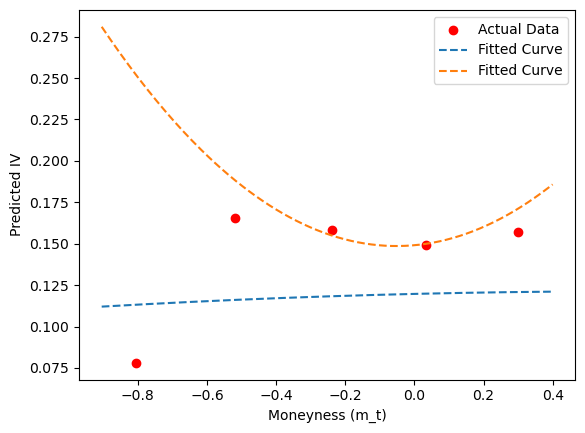

In [32]:
m_t_dense = np.linspace(m_t_current.min() - 0.1, m_t_current.max() + 0.1, 200)
m_t_dense = m_t_dense.reshape(-1, 1)

X_dense = np.column_stack([m_t_dense**2, m_t_dense, np.ones_like(m_t_dense)])
predictions = model.predict(X_dense)

plt.scatter(m_t_current, v_t_current, color='red', label='Actual Data')

# Plot the fitted curve
plt.plot(m_t_dense, predictions, label='Fitted Curve', linestyle='--')
plt.plot(m_t_dense, fitted_global_curve(m_t_dense), label='Fitted Curve', linestyle='--')
plt.xlabel('Moneyness (m_t)')
plt.ylabel('Predicted IV')
plt.legend()
plt.show()

In [33]:
# part 2
m_t_df

,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,VOLCANIC_ROCK_VOUCHER_10000,VOLCANIC_ROCK_VOUCHER_10250,VOLCANIC_ROCK_VOUCHER_10500
combined_ts,,,,,
2_0,-0.804194,-0.517678,-0.238416,0.033950,0.299752
2_100,-0.803115,-0.516598,-0.237336,0.035030,0.300832
2_200,-0.807972,-0.521455,-0.242193,0.030173,0.295975
2_300,-0.809051,-0.522534,-0.243272,0.029094,0.294896
2_400,-0.802575,-0.516059,-0.236797,0.035569,0.301372
...,...,...,...,...,...
4_999500,-0.680992,-0.394476,-0.115214,0.157152,0.422954
4_999600,-0.682084,-0.395567,-0.116305,0.156061,0.421863
4_999700,-0.682630,-0.396113,-0.116851,0.155515,0.421317


In [34]:
def compute_base_iv_series(m_t_df, v_t_df):
    base_iv_series = []

    for timestamp in m_t_df.index:
        m_vals = m_t_df.loc[timestamp].values.astype(float)
        iv_vals = iv_by_voucher.loc[timestamp].values.astype(float)

        # Fit a quadratic polynomial: v_t = a * m_t^2 + b * m_t + c
        coeffs = np.polyfit(m_vals, iv_vals, deg=2)

        # Evaluate the fitted polynomial at m_t = 0: base IV = c
        base_iv = np.polyval(coeffs, 0)
        base_iv_series.append((timestamp, base_iv))

    return pd.Series(dict(base_iv_series), name="base_IV")

In [35]:
# Compute base_IV series from m_t and iv_by_voucher (v_t)
base_iv_ts = compute_base_iv_series(m_t_df, iv_by_voucher)

# # Optional: sort index if needed (e.g., '2_0', '2_100', ... are strings)
# base_iv_ts = base_iv_ts.sort_index()

# # Plot
# plt.figure(figsize=(10, 5))
# plt.plot(base_iv_ts, marker='o')
# plt.title("Fitted Base IV over Time")
# plt.xlabel("Timestamp")
# plt.ylabel("Base Implied Volatility (IV)")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

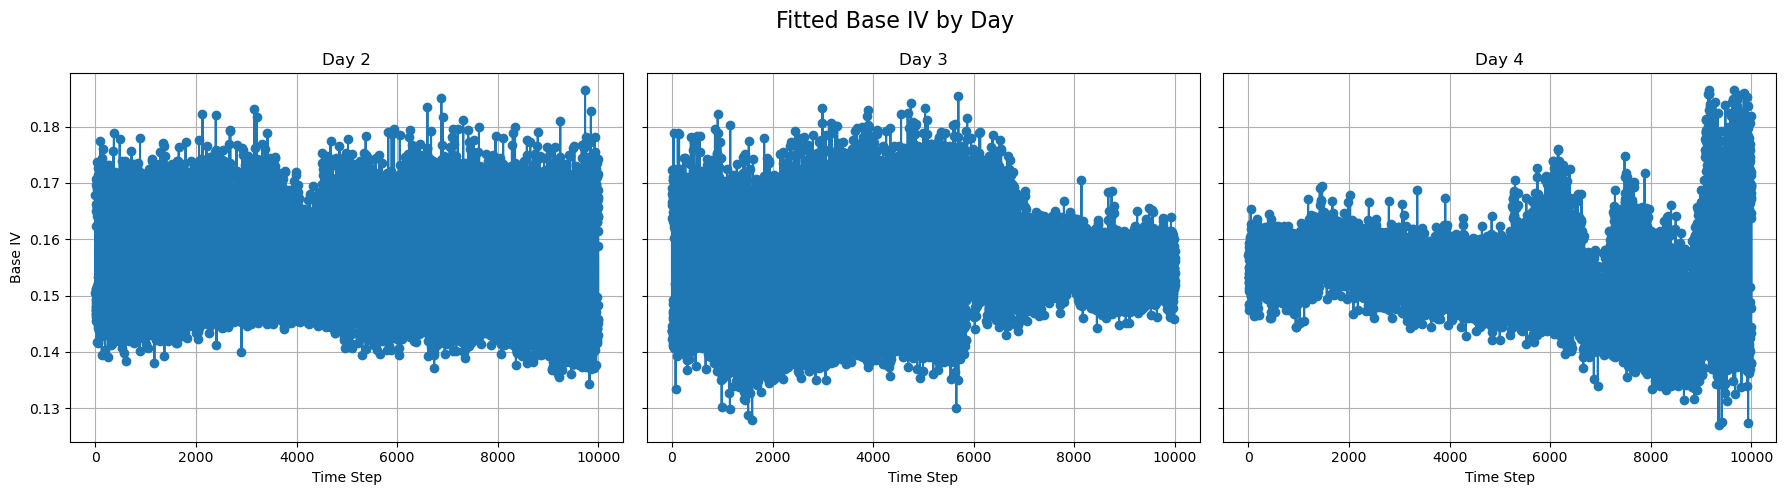

In [36]:
# 2. Parse day number from index (e.g., '2_0' → 2)
base_iv_ts.index = base_iv_ts.index.map(lambda x: int(x.split('_')[0]))

# 3. Group by day and plot each separately
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, day in enumerate(sorted(base_iv_ts.index.unique())):
    day_data = base_iv_ts[base_iv_ts.index == day]
    
    axes[i].plot(day_data.values, marker='o')
    axes[i].set_title(f"Day {day}")
    axes[i].set_xlabel("Time Step")
    axes[i].grid(True)

axes[0].set_ylabel("Base IV")
plt.suptitle("Fitted Base IV by Day", fontsize=16)
plt.tight_layout()
plt.show()

In [37]:
print(base_iv_ts)

2    0.167793
2    0.150500
2    0.147590
2    0.146766
2    0.151202
       ...   
4    0.144378
4    0.137986
4    0.171917
4    0.167479
4    0.147797
Name: base_IV, Length: 30000, dtype: float64
